# Artificial Neural Network

### Importing the libraries

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy import loadtxt
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
tf.__version__

'2.9.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female\GeneCpG\Xtras\Top50_eachFeats
df = pd.read_csv('All5_Top50sCpG_Female.csv')
# Removing a column
dataset = df.drop(['PATNO'], axis = 1)
#dataset.insert (1, 'Age', df ['Age'])
# Making APPRDX values from 1 & 2 to 0 & 1
dataset['APPRDX'] = dataset['APPRDX'] - 1
print(dataset.shape)
dataset.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female\GeneCpG\Xtras\Top50_eachFeats
(150, 229)


,APPRDX,cg11668199,cg04983473,cg25943702,cg01620849,cg22210403,cg21241862,cg19030090,cg02232418,cg18757169,...,cg14548871,cg04721557,cg17218282,cg20471798,cg04948892,cg12751142,cg17957325,cg13520090,cg05538980,cg18580385
0,0,0.045694,0.924158,0.908038,0.033501,0.07147,0.904030,0.917645,0.830685,0.506640,...,0.027095,0.939462,0.767832,0.845091,0.156538,0.510861,0.922070,0.877443,0.792984,0.895246
1,0,0.050506,0.929821,0.928079,0.032749,0.06974,0.914086,0.889673,0.768925,0.535331,...,0.018183,0.939685,0.778352,0.820209,0.150134,0.622603,0.929889,0.778461,0.763160,0.887588


In [3]:
dataset.tail(2)

,APPRDX,cg11668199,cg04983473,cg25943702,cg01620849,cg22210403,cg21241862,cg19030090,cg02232418,cg18757169,...,cg14548871,cg04721557,cg17218282,cg20471798,cg04948892,cg12751142,cg17957325,cg13520090,cg05538980,cg18580385
148,1,0.037671,0.937181,0.889503,0.027040,0.098092,0.853682,0.879239,0.735723,0.556343,...,0.018879,0.912687,0.789966,0.846710,0.115861,0.593508,0.923592,0.830857,0.789654,0.854232
149,1,0.029829,0.932031,0.885029,0.020199,0.045114,0.899346,0.859192,0.732735,0.558189,...,0.024913,0.939579,0.740389,0.834707,0.112277,0.603202,0.929969,0.831216,0.811529,0.880580


In [4]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
print(X)

[[0.0456936  0.92415812 0.90803849 ... 0.87744273 0.79298365 0.89524644]
 [0.05050615 0.92982137 0.92807914 ... 0.77846127 0.76315959 0.88758828]
 [0.03515002 0.93895042 0.88622999 ... 0.8617157  0.82398515 0.90221598]
 ...
 [0.04335481 0.92451225 0.86283734 ... 0.82727662 0.79768849 0.87639012]
 [0.0376711  0.93718062 0.8895031  ... 0.83085706 0.7896543  0.85423178]
 [0.02982884 0.93203115 0.8850288  ... 0.83121647 0.81152901 0.88058002]]


In [5]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### Splitting the dataset into the Training set and Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(y_test)

[0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]


In [7]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Compiling the Network

In [24]:

# Define the keras model
model = Sequential()
model.add(Dense(300, input_shape=(228,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Add the EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(X_train_resampled, y_train_resampled, epochs=100, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 300)               68700     
                                                                 
 batch_normalization_9 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 300)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_10 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 100)              

In [8]:
# Define the keras model
model = Sequential()
model.add(Dense(300, input_shape=(228,), activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization added
model.add(Dropout(0.2))  # Dropout layer added for regularization
model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization added
model.add(Dropout(0.2))  # Dropout layer added for regularization
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.001)))   # L2 regularization added
model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               68700     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 99,821
Trainable params: 99,821
Non-traina

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
#ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=5, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
#ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [9]:
history = model.fit(X_train_resampled, y_train_resampled, epochs = 50, validation_split = 0.2)

Epoch 1/50
5/5 [==============================] - 1s 46ms/step - loss: 1.2409 - accuracy: 0.5109 - val_loss: 1.4530 - val_accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.9035 - accuracy: 0.6277 - val_loss: 1.1036 - val_accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8395 - accuracy: 0.6350 - val_loss: 1.4084 - val_accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.8725 - accuracy: 0.6277 - val_loss: 1.1387 - val_accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 0.8160 - accuracy: 0.6350 - val_loss: 1.0111 - val_accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7965 - accuracy: 0.6277 - val_loss: 1.2221 - val_accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7715 - accuracy: 0.6277 - val_loss: 1.0907 - val_accuracy: 0.0000e+00
Epoc

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

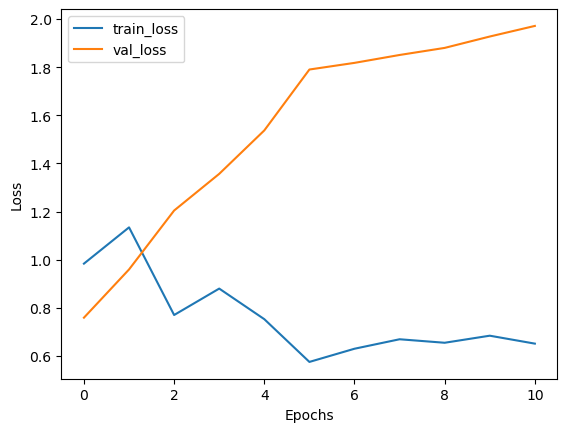

In [25]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

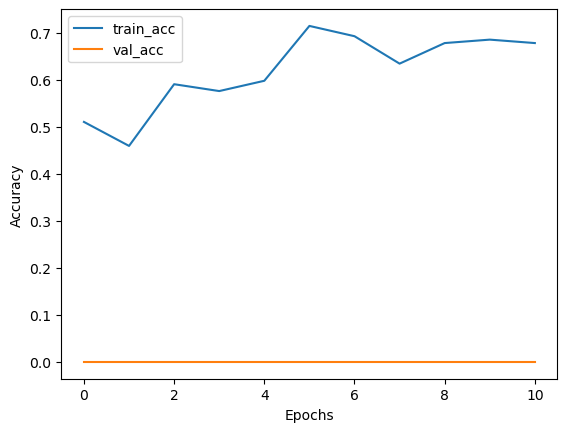

In [26]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

1/1 [==============================] - 0s 16ms/step
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


### Making the Confusion Matrix

In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25  0]
 [ 5  0]]


0.8333333333333334

In [29]:
has_dropout = False
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dropout):
        has_dropout = True
        break
if has_dropout:
    print("Model has dropout layers.")
else:
    print("Model does not have dropout layers.")


Model has dropout layers.


In [30]:
has_regularization = False
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        if layer.kernel_regularizer is not None or layer.bias_regularizer is not None:
            has_regularization = True
            break
if has_regularization:
    print("Model has regularization.")
else:
    print("Model does not have regularization.")


Model does not have regularization.


## Save model

In [16]:
# Save model
#model.save("model_ann.h5")

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               68700     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 99,821
Trainable params: 99,821
Non-traina